# Домашня робота №7

# Перетворення випадкових величин

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Квантильне перетворення

### 1.1 Нормальний розподіл

Нехай випадкова величина $\xi \sim N(0, 1)$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

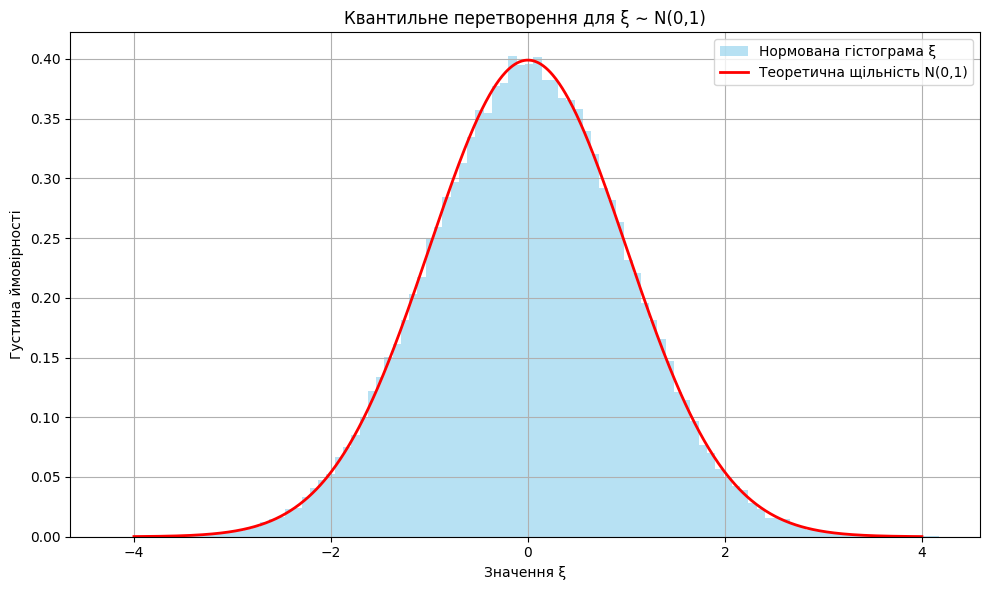

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

n = 100000

U = np.random.uniform(0, 1, n)

xi = norm.ppf(U)

x_vals = np.linspace(-4, 4, 1000)
pdf_vals = norm.pdf(x_vals)

plt.figure(figsize=(10, 6))
plt.hist(xi, bins=100, density=True, alpha=0.6, color='skyblue', label='Нормована гістограма ξ')
plt.plot(x_vals, pdf_vals, 'r-', lw=2, label='Теоретична щільність N(0,1)')
plt.title("Квантильне перетворення для ξ ∼ N(0,1)")
plt.xlabel("Значення ξ")
plt.ylabel("Густина ймовірності")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 2 Відсутність пам'яті

Розглянемо випадкову величину $\xi$ з геометричного розподілу з параметром $p = 0.5$.
Тобто $\xi \sim Geom(0.5)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію ймовірностей випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = (\xi - 1) I_{(\xi - 1) > 0}$;
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих значень випадкової величини $\eta$;
   - функцію ймовірностей випадкової величини $\xi$.

**Зауваження 1.** Графік функції ймовірнстей краще малювати для $10$ значень.

**Зауваження 2.** У гістограмах проміжок значень слід розбивати на одиничні інтервали.

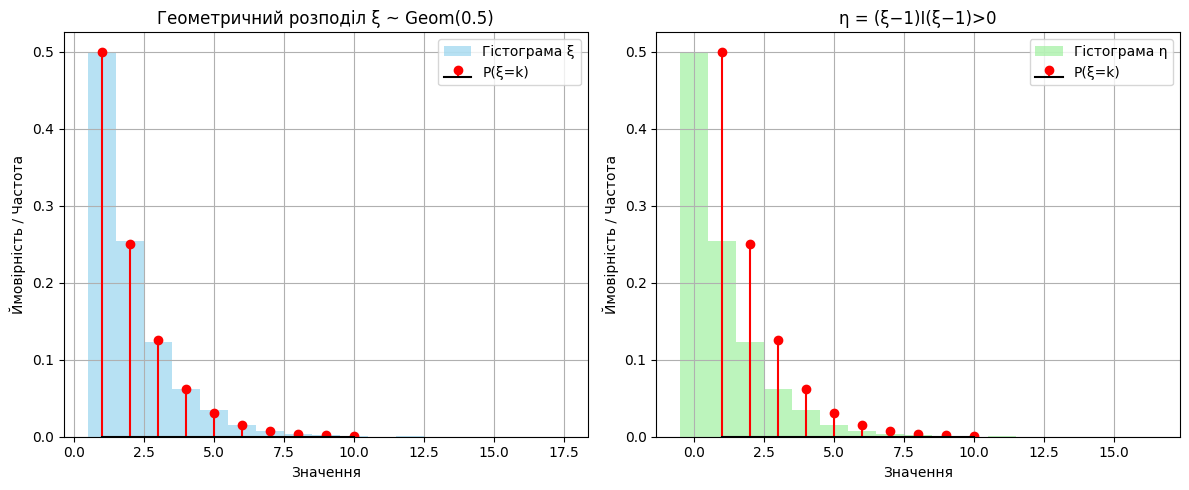

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom

n = 10000
p = 0.5

xi = geom.rvs(p, size=n)
eta = (xi - 1) * (xi > 1)

k_vals = np.arange(1, 11)
pmf_vals = geom.pmf(k_vals, p)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(xi, bins=np.arange(1, xi.max()+2)-0.5, density=True, alpha=0.6, color='skyblue', label='Гістограма ξ')
axes[0].stem(k_vals, pmf_vals, linefmt='r-', markerfmt='ro', basefmt='k-', label='P(ξ=k)')
axes[0].set_title("Геометричний розподіл ξ ~ Geom(0.5)")
axes[0].set_xlabel("Значення")
axes[0].set_ylabel("Ймовірність / Частота")
axes[0].legend()
axes[0].grid(True)

axes[1].hist(eta, bins=np.arange(0, eta.max()+2)-0.5, density=True, alpha=0.6, color='lightgreen', label='Гістограма η')
axes[1].stem(k_vals, pmf_vals, linefmt='r-', markerfmt='ro', basefmt='k-', label='P(ξ=k)')
axes[1].set_title("η = (ξ−1)I(ξ−1)>0")
axes[1].set_xlabel("Значення")
axes[1].set_ylabel("Ймовірність / Частота")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


## 3 Задача 1.11.3

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

**Текст, выделенный полужирным шрифтом**### 3.1 Квадрат

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \xi^2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

<ipython-input-3-fcb56d1dc0c6>:13: RuntimeWarning: divide by zero encountered in power
  pdf_eta = 0.5 * eta_vals**(-0.5) * np.exp(-np.sqrt(eta_vals))


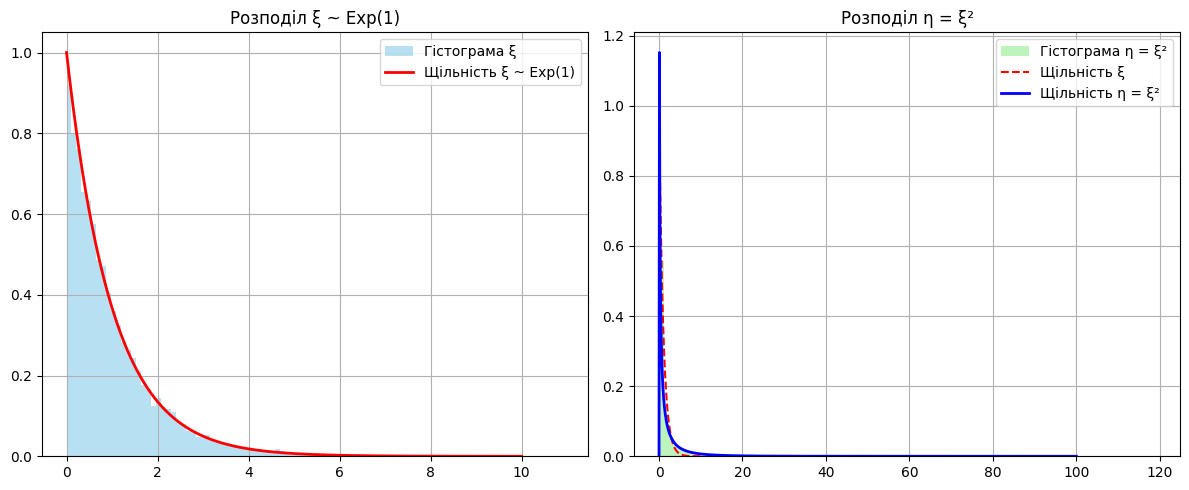

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

n = 10000
xi = expon.rvs(scale=1, size=n)
eta = xi**2

x_vals = np.linspace(0, 10, 1000)
pdf_xi = expon.pdf(x_vals)

eta_vals = np.linspace(0, 100, 1000)
pdf_eta = 0.5 * eta_vals**(-0.5) * np.exp(-np.sqrt(eta_vals))
pdf_eta[0] = 0

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(xi, bins=100, density=True, alpha=0.6, color='skyblue', label='Гістограма ξ')
axes[0].plot(x_vals, pdf_xi, 'r-', lw=2, label='Щільність ξ ~ Exp(1)')
axes[0].set_title("Розподіл ξ ~ Exp(1)")
axes[0].legend()
axes[0].grid(True)

axes[1].hist(eta, bins=100, density=True, alpha=0.6, color='lightgreen', label='Гістограма η = ξ²')
axes[1].plot(x_vals, pdf_xi, 'r--', lw=1.5, label='Щільність ξ')
axes[1].plot(eta_vals, pdf_eta, 'b-', lw=2, label='Щільність η = ξ²')
axes[1].set_title("Розподіл η = ξ²")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


## 4 Одиничний квадрат

Реалізуйте випадкову величину рівномірно розподілену на одиничному квадраті.
Тобто $\xi = (x, y), \quad x, y \sim Unif(0, 1)$.

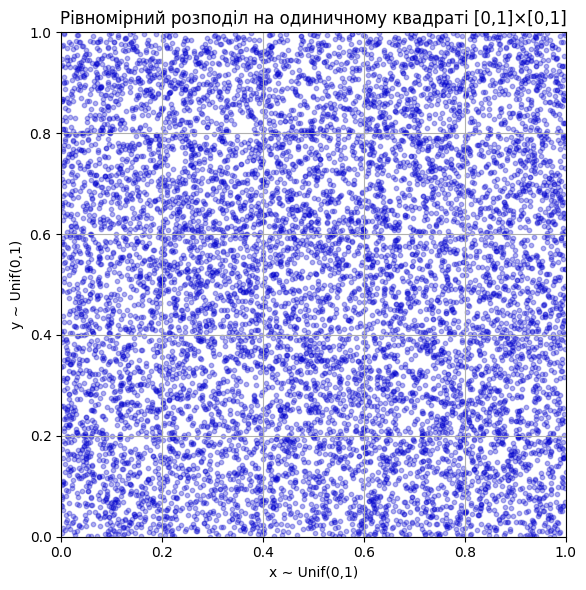

In [4]:
n = 10000
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, alpha=0.3, s=10, color='mediumblue')
plt.title("Рівномірний розподіл на одиничному квадраті [0,1]×[0,1]")
plt.xlabel("x ∼ Unif(0,1)")
plt.ylabel("y ∼ Unif(0,1)")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()


Знайдіть функцію щільності випадкової величини $\xi_3 = |x - y|$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_3$,
отриманою перетвореннями випадкових величин $x, y$.

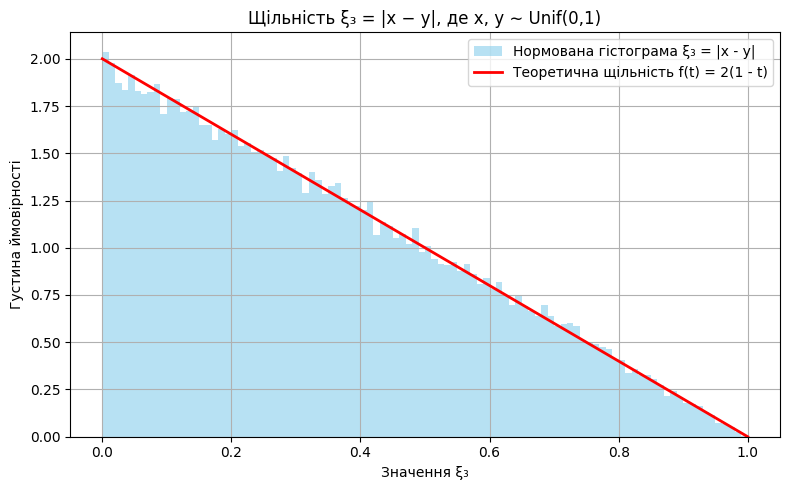

In [5]:
n = 100000
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
xi3 = np.abs(x - y)

t_vals = np.linspace(0, 1, 500)
density_vals = 2 * (1 - t_vals)

plt.figure(figsize=(8, 5))
plt.hist(xi3, bins=100, range=(0, 1), density=True, alpha=0.6, color='skyblue', label='Нормована гістограма ξ₃ = |x - y|')
plt.plot(t_vals, density_vals, 'r-', lw=2, label='Теоретична щільність f(t) = 2(1 - t)')
plt.title("Щільність ξ₃ = |x − y|, де x, y ∼ Unif(0,1)")
plt.xlabel("Значення ξ₃")
plt.ylabel("Густина ймовірності")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
